In [111]:
#### 한글 깨짐이 이방법으로는 해결이 안됐음
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,369 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155013 files and d

In [8]:
### 한글 깨짐 해결 코드
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum-eco.
(Reading database ... 155031 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumBarunGothic


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
### 김한용님께서 보내주신 merge된 자료에서 크롤링과정중 중복돼 들어온 영화들을 제거 했습니다
df = pd.read_csv('movie_5cn.csv')
df = df[df['역대순위'].notna()]

#### 크롤링 과정에서 시리즈 영화나 비슷한 제목은 중복돼 입력된 것들이 많이 중복제거를 해주고 index를 다시 설정했습니다
df = df.drop_duplicates(['역대순위']).reset_index()

### 불필요한 열 제거
del df['index']


###### 개봉일 날짜에서 월에 해당하는 부분만 꺼내 type을 정수로 변환시키고 계절로 분류시켰습니다
##### 나중에 더미변수로 활용 기대
month_list=[]
for i in range(len(df.개봉일)):
  if 3<=int(df.개봉일[i][-7:-5])<6:
    month_list.append('봄')
  elif 6<=int(df.개봉일[i][-7:-5])<9:
    month_list.append('여름')
  elif 9<=int(df.개봉일[i][-7:-5])<12:
    month_list.append('가을')
  else:
    month_list.append('겨울')

df['계절']=month_list

### 개봉년도를 column에 추가해 보겠습니다
year_list=[]
for i in range(len(df.개봉일)):
  x = df.개봉일[i][-11:-7]
  year_list.append(int(x))

df['개봉연도']=year_list
####
##### 추천 열에 해당하는 텍스트중에 필요한 정보들만 뽑아 새로운 column으로 만들겠습니다.
### 추천 텍스트에서 연령층
per_list=[]
for i in range(len(df.개봉일)):
  x = df['추천'][i][6:8]
  per_list.append(int(x))

df['추천_연령대']=per_list

### 추천 텍스트에서 성별
sex_list=[]
for i in range(len(df.개봉일)):
  x = df['추천'][i][10:12]
  sex_list.append(x)

df['추천_성별']=sex_list

### 추천 텍스트에서 특징
spe_list=[]
for i in range(len(df.개봉일)):
  x = df['추천'][i][19:-12]
  spe_list.append(x)

df['영화_특징']=spe_list

###### 보기 편하게 하기위해 추천 열을 삭제했습니다.
del df['추천']


####### 작업중 크롤링 과정에서 같은 패턴의 코드를 복붙후 
####### 숫자를 바꿔주지 않아 누락된 30대 40대 50대 정보를 추가해 주기위해 merge를 이용했습니다.
df2=pd.read_csv('네이버_영화+비율_및_성별만족도.csv')
### 그 과정에서 (10대 20대)와 (30대 40대 50대)가 분리돼 있는 것이 자료를 보는데 불편함이 있어 
### 10대 20대를 제거후 다시 merge 시켰습니다
del df['10대 비율']
del df['20대 비율']
df3 = pd.merge(df,df2,how='left')
#### 불필요한 
del df3['Unnamed: 0']
del df3['추천']
df = df3
### 매출액과 관객수의 숫자가 너무 커 만원단위 만명단위로 숫자의 크기를 줄였습니다
df['관객수(단위:만명)']=round(df['관객수']/10000,0)
df['매출액(단위:만원)']=round(df['매출액']/10000,0)
### 필요없는 열 제거
del df['매출액']
del df['관객수']
### 영화리뷰 열의 정보가 부족해 이 자료에서는 없애겠습니다
del df['영화리뷰']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 0 to 467
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   영화제목        468 non-null    object 
 1   역대순위        468 non-null    float64
 2   개봉일         468 non-null    object 
 3   장르          467 non-null    object 
 4   영화시간        468 non-null    object 
 5   국적          468 non-null    object 
 6   감독          325 non-null    object 
 7   주연배우        295 non-null    object 
 8   스크린수        468 non-null    float64
 9   관람객평점       468 non-null    object 
 10  네티즌평점       468 non-null    float64
 11  비평가평점       129 non-null    object 
 12  남성 만족도      468 non-null    float64
 13  여성 만족도      468 non-null    float64
 14  배급사         467 non-null    object 
 15  계절          468 non-null    object 
 16  개봉연도        468 non-null    int64  
 17  추천_연령대      468 non-null    int64  
 18  추천_성별       468 non-null    object 
 19  영화_특징       468 non-null    o

In [13]:
df.describe()

,역대순위,스크린수,네티즌평점,남성 만족도,여성 만족도,개봉연도,추천_연령대,관객수(단위:만명),매출액(단위:만원)
count,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,4.620000e+02
mean,246.581197,842.668803,8.067585,7.589444,8.470150,2012.700855,18.525641,420.722222,2.853402e+06
std,146.957174,593.980605,0.944953,1.166609,0.902775,4.969310,6.654955,289.090569,2.610442e+06
min,1.000000,0.000000,3.340000,2.810000,1.900000,1998.000000,10.000000,179.000000,0.000000e+00
25%,118.750000,462.000000,7.590000,6.957500,8.090000,2009.000000,10.000000,229.000000,1.476932e+06
50%,247.500000,781.000000,8.235000,7.770000,8.655000,2014.000000,20.000000,305.000000,2.150666e+06
75%,372.250000,1177.750000,8.792500,8.445000,9.090000,2017.000000,20.000000,494.250000,3.728582e+06
max,500.000000,2835.000000,9.420000,9.410000,10.000000,2021.000000,40.000000,1761.000000,1.396480e+07


In [14]:
### 상관 관계를 보겠습니다
df.corr()

,역대순위,스크린수,네티즌평점,남성 만족도,여성 만족도,개봉연도,추천_연령대,관객수(단위:만명),매출액(단위:만원)
역대순위,1.000000,-0.373631,-0.288123,-0.203314,-0.247781,-0.154298,0.083882,-0.827523,-0.702439
스크린수,-0.373631,1.000000,-0.031337,-0.147852,0.001816,0.814956,0.345107,0.428081,0.681356
네티즌평점,-0.288123,-0.031337,1.000000,0.927638,0.883524,-0.018272,-0.087056,0.271184,0.232618
남성 만족도,-0.203314,-0.147852,0.927638,1.000000,0.715404,-0.141191,-0.073168,0.184199,0.122594
여성 만족도,-0.247781,0.001816,0.883524,0.715404,1.000000,0.030912,-0.099475,0.242474,0.222745
개봉연도,-0.154298,0.814956,-0.018272,-0.141191,0.030912,1.000000,0.480680,0.155941,0.480275
추천_연령대,0.083882,0.345107,-0.087056,-0.073168,-0.099475,0.480680,1.000000,-0.069911,0.063572
관객수(단위:만명),-0.827523,0.428081,0.271184,0.184199,0.242474,0.155941,-0.069911,1.000000,0.864708
매출액(단위:만원),-0.702439,0.681356,0.232618,0.122594,0.222745,0.480275,0.063572,0.864708,1.000000


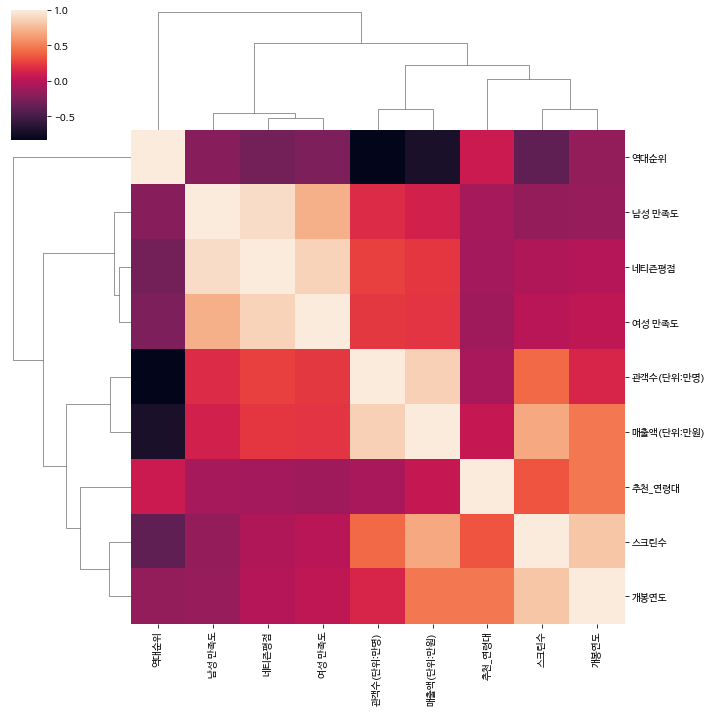

In [15]:
sns.clustermap(df.corr())

In [19]:
df.groupby['개봉연도']

TypeError: ignored